In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('merged_recipes_yelp.csv')

In [3]:
df.head(10)

name_x  id  minutes  contributor_id  \
0  arriba   baked winter squash mexican style   0       55           47892   
1            a bit different  breakfast pizza   1       30           26278   
2                   all in the kitchen  chili   2      130          196586   
3                          alouette  potatoes   3       45           68585   
4          amish  tomato ketchup  for canning   4      190           41706   
5                     apple a day  milk shake   5        0            1533   
6                       aww  marinated olives   6       15           21730   
7              backyard style  barbecued ribs   7      120           10404   
8                    bananas 4 ice cream  pie   8      180          102353   
9                     beat this  banana bread   9       70           15892   

    submitted                                               tags  \
0   9/16/2005  ['60-minutes-or-less', 'time-to-make', 'course...   
1   6/17/2002  ['30-minutes-or-less', 'time-to-make', 'course...   
2   2/25/2005  ['time-to-make', 'course', 'preparation', 'mai...   
3   4/14/2003  ['60-minutes-or-less', 'time-to-make', 'course...   
4  10/25/2002  ['weeknight', 'time-to-make', 'course', 'main-...   
5   12/6/1999  ['15-minutes-or-less', 'time-to-make', 'course...   
6   4/14/2002  ['15-minutes-or-less', 'time-to-make', 'course...   
7   7/30/2003  ['weeknight', 'time-to-make', 'course', 'main-...   
8   9/10/2003  ['weeknight', 'time-to-make', 'course', 'main-...   
9   11/4/2003  ['weeknight', 'time-to-make', 'course', 'main-...   

                                           nutrition  n_steps  \
0              [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1          [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2         [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3          [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4          [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
5           [160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]        4   
6           [380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]        4   
7     [1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]       10   
8  [4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...        8   
9  [2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]       12   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   
5  ['combine ingredients in blender', 'cover and ...   
6  ['toast the fennel seeds and lightly crush the...   
7  ['in a medium saucepan combine all the ingredi...   
8  ['crumble cookies into a 9-inch pie plate , or...   
9  ['preheat oven to 350 degrees', 'butter two 9x...   

                                         description  ... state  postal_code  \
0  autumn is my favorite time of year to cook! th...  ...    CA        93101   
1  this recipe calls for the crust to be prebaked...  ...    MO        63123   
2  this modified version of 'mom's' chili was a h...  ...    AZ        85711   
3  this is a super easy, great tasting, make ahea...  ...    PA        19107   
4  my dh's amish mother raised him on this recipe...  ...    PA        18054   
5                                                NaN  ...    TN        37015   
6  my italian mil was thoroughly impressed by my ...  ...    MO        63144   
7  this recipe is posted by request and was origi...  ...    FL        33707   
8                                                NaN  ...    MO        63123   
9                                from ann hodgman's   ...    TN        37207   

    latitude   longitude stars review_count is_open  \
0  34.426679 -119.711197   5.0            7       0   
1  38.551126  -90.335695   3.0           15       1   
2  32.223236 -110.880452   3.5           22       0 

In [4]:
df.shape

(150346, 25)

In [5]:
df.columns

Index(['name_x', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'name_y', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [6]:
df['is_restaurant'] = df['categories'].str.contains("Restaurants", na=False)
df= df[df['is_restaurant']]

In [7]:
df.name_y

3                    St Honore Pastries
5                        Sonic Drive-In
8                 Tsevi's Pub And Grill
9                        Sonic Drive-In
11                Vietnamese Food Truck
                      ...              
150325                             Wawa
150327                Dutch Bros Coffee
150336    Adelita Taqueria & Restaurant
150339                     The Plum Pit
150340            West Side Kebab House
Name: name_y, Length: 52268, dtype: object

In [8]:
df.submitted

3         4/14/2003
5         12/6/1999
8         9/10/2003
9         11/4/2003
11        10/3/2002
            ...    
150325     7/1/2003
150327    1/30/2008
150336    1/24/2005
150339     4/6/2006
150340    5/31/2007
Name: submitted, Length: 52268, dtype: object

In [9]:
df.rename(columns={'name_x':'recipe_name','name_y':'restaurant'},inplace=True)

In [10]:
df.drop(columns=['submitted','tags','description'],inplace=True)

In [11]:
df.columns


Index(['recipe_name', 'id', 'minutes', 'contributor_id', 'nutrition',
       'n_steps', 'steps', 'ingredients', 'n_ingredients', 'restaurant',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'is_restaurant'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52268 entries, 3 to 150340
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recipe_name     52267 non-null  object 
 1   id              52268 non-null  int64  
 2   minutes         52268 non-null  int64  
 3   contributor_id  52268 non-null  int64  
 4   nutrition       52268 non-null  object 
 5   n_steps         52268 non-null  int64  
 6   steps           52268 non-null  object 
 7   ingredients     52268 non-null  object 
 8   n_ingredients   52268 non-null  int64  
 9   restaurant      52268 non-null  object 
 10  address         51825 non-null  object 
 11  city            52268 non-null  object 
 12  state           52268 non-null  object 
 13  postal_code     52247 non-null  object 
 14  latitude        52268 non-null  float64
 15  longitude       52268 non-null  float64
 16  stars           52268 non-null  float64
 17  review_count    52268 non-null

In [13]:
df.rename(columns={'stars':'rating'},inplace=True)

In [14]:
df.rename(columns={'contributor_id':'meal_id'},inplace=True)

In [15]:
df.rename(columns={'id':'user_id'},inplace=True)

In [16]:
df.isnull().sum()

recipe_name         1
user_id             0
minutes             0
meal_id             0
nutrition           0
n_steps             0
steps               0
ingredients         0
n_ingredients       0
restaurant          0
address           443
city                0
state               0
postal_code        21
latitude            0
longitude           0
rating              0
review_count        0
is_open             0
attributes        565
categories          0
hours            7278
is_restaurant       0
dtype: int64

In [17]:
df.drop(columns=['hours','attributes','categories','address','longitude','latitude'],inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
np.set_printoptions(threshold=np.inf)

In [20]:
df.isnull().sum()

recipe_name       1
user_id           0
minutes           0
meal_id           0
nutrition         0
n_steps           0
steps             0
ingredients       0
n_ingredients     0
restaurant        0
city              0
state             0
postal_code      21
rating            0
review_count      0
is_open           0
is_restaurant     0
dtype: int64

In [21]:
df['recipe_name'].fillna('gedo',inplace=True)

In [22]:
df.drop(columns=['postal_code'],inplace=True)

In [23]:
df.isnull().sum()

recipe_name      0
user_id          0
minutes          0
meal_id          0
nutrition        0
n_steps          0
steps            0
ingredients      0
n_ingredients    0
restaurant       0
city             0
state            0
rating           0
review_count     0
is_open          0
is_restaurant    0
dtype: int64

In [24]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df.nutrition.str.split(",",expand=True) 

In [25]:
df['calories'] =  df['calories'].apply(lambda x: x.replace('[','')) 
df['carbohydrates (PDV)'] =  df['carbohydrates (PDV)'].apply(lambda x: x.replace(']','')) 
df.head()

recipe_name  user_id  minutes  meal_id  \
3              alouette  potatoes        3       45    68585   
5         apple a day  milk shake        5        0     1533   
8        bananas 4 ice cream  pie        8      180   102353   
9         beat this  banana bread        9       70    15892   
11  better than sex  strawberries       11     1460    41531   

                                            nutrition  n_steps  \
3           [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
5            [160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]        4   
8   [4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...        8   
9   [2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]       12   
11      [734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]        8   

                                                steps  \
3   ['place potatoes in a large pot of lightly sal...   
5   ['combine ingredients in blender', 'cover and ...   
8   ['crumble cookies into a 9-inch pie plate , or...   
9   ['preheat oven to 350 degrees', 'butter two 9x...   
11  ['crush vanilla wafers into fine crumbs and li...   

                                          ingredients  n_ingredients  \
3   ['spreadable cheese with garlic and herbs', 'n...             11   
5   ['milk', 'vanilla ice cream', 'frozen apple ju...              4   
8   ['chocolate sandwich style cookies', 'chocolat...              6   
9   ['sugar', 'unsalted butter', 'bananas', 'eggs'...              9   
11  ['vanilla wafers', 'butter', 'powdered sugar',...              7   

               restaurant          city state  rating  review_count  is_open  \
3      St Honore Pastries  Philadelphia    PA     4.0            80        1   
5          Sonic Drive-In  Ashland City    TN     2.0             6        1   
8   Tsevi's Pub And Grill        Affton    MO     3.0            19        0   
9          Sonic Drive-In     Nashville    TN     1.5            10        1   
11  Vietnamese Food Truck     Tampa Bay    FL     4.0            10        1   

    is_restaurant calories total fat (PDV) sugar (PDV) sodium (PDV)  \
3            True    368.1            17.0        10.0          2.0   
5            True    160.2            10.0        55.0          3.0   
8            True   4270.8           254.0      1306.0        111.0   
9            True   2669.3           160.0       976.0        107.0   
11           True    734.1            66.0       199.0         10.0   

   protein (PDV) saturated fat (PDV) carbohydrates (PDV)  
3           14.0                 8.0                20.0  
5            9.0                20.0                 7.0  
8          127.0               431.0               220.0  
9           62.0               310.0               138.0  
11          10.0               117.0                28.0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52268 entries, 3 to 150340
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recipe_name          52268 non-null  object 
 1   user_id              52268 non-null  int64  
 2   minutes              52268 non-null  int64  
 3   meal_id              52268 non-null  int64  
 4   nutrition            52268 non-null  object 
 5   n_steps              52268 non-null  int64  
 6   steps                52268 non-null  object 
 7   ingredients          52268 non-null  object 
 8   n_ingredients        52268 non-null  int64  
 9   restaurant           52268 non-null  object 
 10  city                 52268 non-null  object 
 11  state                52268 non-null  object 
 12  rating               52268 non-null  float64
 13  review_count         52268 non-null  int64  
 14  is_open              52268 non-null  int64  
 15  is_restaurant        52268 non-null

In [27]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52268 entries, 3 to 150340
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recipe_name          52268 non-null  object 
 1   user_id              52268 non-null  int64  
 2   minutes              52268 non-null  int64  
 3   meal_id              52268 non-null  int64  
 4   nutrition            52268 non-null  object 
 5   n_steps              52268 non-null  int64  
 6   steps                52268 non-null  object 
 7   ingredients          52268 non-null  object 
 8   n_ingredients        52268 non-null  int64  
 9   restaurant           52268 non-null  object 
 10  city                 52268 non-null  object 
 11  state                52268 non-null  object 
 12  rating               52268 non-null  float64
 13  review_count         52268 non-null  int64  
 14  is_open              52268 non-null  int64  
 15  is_restaurant        52268 non-null

In [28]:
df.drop(['nutrition', 'is_open', 'steps', 'n_steps','minutes' ], axis=1,inplace = True)

In [29]:
df.drop(['state','n_ingredients'  ], axis=1,inplace = True)

In [30]:
# creating a new column for food types and fill in with nan values 
df['food types'] = np.nan
df['food types'] = df['food types'].astype('str')

In [31]:
def classify_food_type(row):
    ingredients = row['ingredients']
    calories = row['calories']

    # Veg dessert and Non-Veg dessert
    if 'eggs' not in ingredients:
        if any(item in ingredients for item in ['ice-cream', 'chocolate', 'cookies']):
            return 'Veg dessert'
    elif 'eggs' in ingredients:
        if any(item in ingredients for item in ['ice-cream', 'chocolate', 'cookies']):
            return 'Non-Veg dessert'

    #  Healthy type
    if pd.notna(calories) and 20 < calories < 300:
        return 'Healthy'
    
    # Non-veg type
    if any(item in ingredients for item in ['chicken', 'eggs', 'ham', 'pepperoni']):
        return 'Non-veg'

    # Default 
    return 'Veg'


df['food types'] = df.apply(classify_food_type, axis=1)

In [32]:
df.head()

recipe_name  user_id  meal_id  \
3              alouette  potatoes        3    68585   
5         apple a day  milk shake        5     1533   
8        bananas 4 ice cream  pie        8   102353   
9         beat this  banana bread        9    15892   
11  better than sex  strawberries       11    41531   

                                          ingredients             restaurant  \
3   ['spreadable cheese with garlic and herbs', 'n...     St Honore Pastries   
5   ['milk', 'vanilla ice cream', 'frozen apple ju...         Sonic Drive-In   
8   ['chocolate sandwich style cookies', 'chocolat...  Tsevi's Pub And Grill   
9   ['sugar', 'unsalted butter', 'bananas', 'eggs'...         Sonic Drive-In   
11  ['vanilla wafers', 'butter', 'powdered sugar',...  Vietnamese Food Truck   

            city  rating  review_count  is_restaurant  calories  \
3   Philadelphia     4.0            80           True     368.1   
5   Ashland City     2.0             6           True     160.2   
8         Affton     3.0            19           True    4270.8   
9      Nashville     1.5            10           True    2669.3   
11     Tampa Bay     4.0            10           True     734.1   

    total fat (PDV)  sugar (PDV)  sodium (PDV)  protein (PDV)  \
3              17.0         10.0           2.0           14.0   
5              10.0         55.0           3.0            9.0   
8             254.0       1306.0         111.0          127.0   
9             160.0        976.0         107.0           62.0   
11             66.0        199.0          10.0           10.0   

    saturated fat (PDV)  carbohydrates (PDV)   food types  
3                   8.0                 20.0          Veg  
5                  20.0                  7.0      Healthy  
8                 431.0                220.0  Veg dessert  
9                 310.0                138.0      Non-veg  
11                117.0                 28.0      Non-veg

In [33]:
df.ingredients

3         ['spreadable cheese with garlic and herbs', 'n...
5         ['milk', 'vanilla ice cream', 'frozen apple ju...
8         ['chocolate sandwich style cookies', 'chocolat...
9         ['sugar', 'unsalted butter', 'bananas', 'eggs'...
11        ['vanilla wafers', 'butter', 'powdered sugar',...
12        ['great northern bean', 'chicken bouillon cube...
14        ['gentian root', 'scullcap herb', 'burnet root...
15        ['lean pork chops', 'flour', 'salt', 'dry must...
19        ['canola oil', 'onion', 'garlic', 'cauliflower...
20        ['water', 'salt', 'boiling potatoes', 'fresh s...
22        ['boneless skinless chicken breast halves', 'c...
23        ['all-purpose flour', 'granulated sugar', 'bak...
24        ['butter', 'lemon, juice of', 'salt', 'white p...
27        ['beef stew meat', 'water', 'tomatoes', 'beef ...
28                ['red potatoes', 'margarine', 'rosemary']
29        ['unsalted butter', 'carrot', 'onion', 'celery...
31        ['ground beef', 'onion', 'toma

In [34]:
#allergens = ['milk', 'eggs', 'peanuts', 'tree nuts', 'soy', 'wheat', 'fish', 'shellfish']
#def identify_allergens(ingredients):
   # ingredients_list = [ingredient.strip().lower() for ingredient in ingredients.split(',')]
   # found_allergens = [allergen for allergen in allergens if any(allergen in ingredient for ingredient in ingredients_list)]
  #  return found_allergens if found_allergens else 'None'

# Apply the function to add the allergy types column
#df['allergy types'] = df['ingredients'].apply(identify_allergens)
#df.info()

In [35]:
df.head()

recipe_name  user_id  meal_id  \
3              alouette  potatoes        3    68585   
5         apple a day  milk shake        5     1533   
8        bananas 4 ice cream  pie        8   102353   
9         beat this  banana bread        9    15892   
11  better than sex  strawberries       11    41531   

                                          ingredients             restaurant  \
3   ['spreadable cheese with garlic and herbs', 'n...     St Honore Pastries   
5   ['milk', 'vanilla ice cream', 'frozen apple ju...         Sonic Drive-In   
8   ['chocolate sandwich style cookies', 'chocolat...  Tsevi's Pub And Grill   
9   ['sugar', 'unsalted butter', 'bananas', 'eggs'...         Sonic Drive-In   
11  ['vanilla wafers', 'butter', 'powdered sugar',...  Vietnamese Food Truck   

            city  rating  review_count  is_restaurant  calories  \
3   Philadelphia     4.0            80           True     368.1   
5   Ashland City     2.0             6           True     160.2   
8         Affton     3.0            19           True    4270.8   
9      Nashville     1.5            10           True    2669.3   
11     Tampa Bay     4.0            10           True     734.1   

    total fat (PDV)  sugar (PDV)  sodium (PDV)  protein (PDV)  \
3              17.0         10.0           2.0           14.0   
5              10.0         55.0           3.0            9.0   
8             254.0       1306.0         111.0          127.0   
9             160.0        976.0         107.0           62.0   
11             66.0        199.0          10.0           10.0   

    saturated fat (PDV)  carbohydrates (PDV)   food types  
3                   8.0                 20.0          Veg  
5                  20.0                  7.0      Healthy  
8                 431.0                220.0  Veg dessert  
9                 310.0                138.0      Non-veg  
11                117.0                 28.0      Non-veg

In [36]:
import ast
df['ingredients'] = df['ingredients'].apply(lambda x: ast.literal_eval(x))

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

scaler = StandardScaler()
df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']] = scaler.fit_transform(df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']])

In [38]:
df.head()

recipe_name  user_id  meal_id  \
3              alouette  potatoes        3    68585   
5         apple a day  milk shake        5     1533   
8        bananas 4 ice cream  pie        8   102353   
9         beat this  banana bread        9    15892   
11  better than sex  strawberries       11    41531   

                                          ingredients             restaurant  \
3   [spreadable cheese with garlic and herbs, new ...     St Honore Pastries   
5   [milk, vanilla ice cream, frozen apple juice c...         Sonic Drive-In   
8   [chocolate sandwich style cookies, chocolate s...  Tsevi's Pub And Grill   
9   [sugar, unsalted butter, bananas, eggs, fresh ...         Sonic Drive-In   
11  [vanilla wafers, butter, powdered sugar, eggs,...  Vietnamese Food Truck   

            city  rating  review_count  is_restaurant  calories  \
3   Philadelphia     4.0            80           True -0.128359   
5   Ashland City     2.0             6           True -0.367918   
8         Affton     3.0            19           True  4.368648   
9      Nashville     1.5            10           True  2.523270   
11     Tampa Bay     4.0            10           True  0.293376   

    total fat (PDV)  sugar (PDV)  sodium (PDV)  protein (PDV)  \
3         -0.198255    -0.275196     -0.280735      -0.369579   
5         -0.267292    -0.111480     -0.270616      -0.459771   
8          2.139144     4.439822      0.822238       1.668772   
9          1.212075     3.239239      0.781762       0.496269   
11         0.285005     0.412411     -0.199782      -0.441733   

    saturated fat (PDV)  carbohydrates (PDV)   food types  
3             -0.372497             0.129019          Veg  
5             -0.258981            -0.251768      Healthy  
8              3.628923             5.987271  Veg dessert  
9              2.484309             3.585388      Non-veg  
11             0.658602             0.363349      Non-veg

In [39]:
# Convert ingredients list to string format
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['ingredients_str'])


In [40]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['ingredients_str'])

In [41]:
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

count_df.head()

10  100  10x  12  15  151  16  18  35  43  57  70  80  85  90  93  95  96  \
0   0    0    0   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0    0    0   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0    0    0   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0    0    0   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0    0    0   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0   

   97  98  abalone  absinthe  absolut  aburage  accent  achiote  achute  acid  \
0   0   0        0         0        0        0       0        0       0     0   
1   0   0        0         0        0        0       0        0       0     0   
2   0   0        0         0        0        0       0        0       0     0   
3   0   0        0         0        0        0       0        0       0     0   
4   0   0        0         0        0        0       0        0       0     0   

   acini  acorn  acting  active  added  adobo  adolph  advocaat  adzuki  agar  \
0      0      0       0       0      0      0       0         0       0     0   
1      0      0       0       0      0      0       0         0       0     0   
2      0      0       0       0      0      0       0         0       0     0   
3      0      0       0       0      0      0       0         0       0     0   
4      0      0       0       0      0      0       0         0       0     0   

   agave  aged  ahi  aid  aioli  aji  ajinomoto  ajmoh  ajwain  al  albacore  \
0      0     0    0    0      0    0          0      0       0   0         0   
1      0     0    0    0      0    0          0      0       0   0         0   
2      0     0    0    0      0    0          0      0       0   0         0   
3      0     0    0    0      0    0          0      0       0   0         0   
4      0     0    0    0      0    0          0      0       0   0         0   

   alcohol  alcoholic  ale  aleppo  alfalfa  alfredo  alkalized  all  \
0        0          0    0       0        0        0          0    0   
1        0          0    0       0        0        0          0    0   
2        0          0    0       0        0        0          0    0   
3        0          0    0       0        0        0          0    0   
4        0          0    0       0        0        0          0    0   

   alligator  allspice  almond  almonds  aloe  alphabet  alphonso  \
0          0         0       0        0     0         0         0   
1          0         0       0        0     0         0         0   
2          0         0       0        0     0         0         0   
3          0         0       0        0     0         0         0   
4          0         0       0        0     0         0         0   

   alternatives  alum  aluminum  amaranth  amaretti  amarettinis  amaretto  \
0             0     0         0         0         0            0         0   
1             0     0         0         0         0            0         0   
2             0     0         0         0         0            0         0   
3             0     0         0         0         0            0         0   
4             0     0         0         0         0            0         0   

   amarula  amber  amchoor  amchur  american  amino  aminos  amish  ammonia  \
0        0      0        0       0         0      0       0      0        0   
1        0      0        0       0         0      0       0      0        0   
2        0      0        0       0         0      0       0      0        0   
3        0      0        0       0         0      0       0      0        0   
4        0      0        0       0         0      0       0      0        0   

   anaheim  anasazi  ancho  anchovies  anchovy  and  andes  andouille  anejo  \
0        0        0      0          0        0    1      0          0      0   
1        0        0      0          0        0    0      0          0      0   
2        0        0      0         

In [42]:
df = pd.get_dummies(df, columns=['food types'])

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

reduced_features = pca.fit_transform(tfidf_matrix.toarray())
reduced_features_df = pd.DataFrame(reduced_features, columns=[f'pca_feature_{i}' for i in range(reduced_features.shape[1])])

In [44]:
df = pd.concat([df, reduced_features_df], axis=1)

df.head()


recipe_name  user_id   meal_id  \
3              alouette  potatoes      3.0   68585.0   
5         apple a day  milk shake      5.0    1533.0   
8        bananas 4 ice cream  pie      8.0  102353.0   
9         beat this  banana bread      9.0   15892.0   
11  better than sex  strawberries     11.0   41531.0   

                                          ingredients             restaurant  \
3   [spreadable cheese with garlic and herbs, new ...     St Honore Pastries   
5   [milk, vanilla ice cream, frozen apple juice c...         Sonic Drive-In   
8   [chocolate sandwich style cookies, chocolate s...  Tsevi's Pub And Grill   
9   [sugar, unsalted butter, bananas, eggs, fresh ...         Sonic Drive-In   
11  [vanilla wafers, butter, powdered sugar, eggs,...  Vietnamese Food Truck   

            city  rating  review_count is_restaurant  calories  \
3   Philadelphia     4.0          80.0          True -0.128359   
5   Ashland City     2.0           6.0          True -0.367918   
8         Affton     3.0          19.0          True  4.368648   
9      Nashville     1.5          10.0          True  2.523270   
11     Tampa Bay     4.0          10.0          True  0.293376   

    total fat (PDV)  sugar (PDV)  sodium (PDV)  protein (PDV)  \
3         -0.198255    -0.275196     -0.280735      -0.369579   
5         -0.267292    -0.111480     -0.270616      -0.459771   
8          2.139144     4.439822      0.822238       1.668772   
9          1.212075     3.239239      0.781762       0.496269   
11         0.285005     0.412411     -0.199782      -0.441733   

    saturated fat (PDV)  carbohydrates (PDV)  \
3             -0.372497             0.129019   
5             -0.258981            -0.251768   
8              3.628923             5.987271   
9              2.484309             3.585388   
11             0.658602             0.363349   

                                      ingredients_str  food types_Healthy  \
3   spreadable cheese with garlic and herbs new po...                 0.0   
5   milk vanilla ice cream frozen apple juice conc...                 1.0   
8   chocolate sandwich style cookies chocolate syr...                 0.0   
9   sugar unsalted butter bananas eggs fresh lemon...                 0.0   
11  vanilla wafers butter powdered sugar eggs whip...                 0.0   

    food types_Non-Veg dessert  food types_Non-veg  food types_Veg  \
3                          0.0                 0.0             1.0   
5                          0.0                 0.0             0.0   
8                          0.0                 0.0             0.0   
9                          0.0                 1.0             0.0   
11                         0.0                 1.0             0.0   

    food types_Veg dessert  pca_feature_0  pca_feature_1  pca_feature_2  \
3                      0.0       0.277104      -0.189574       0.144085   
5                      0.0      -0.010652      -0.092815      -0.084338   
8                      1.0      -0.136825      -0.029672      -0.016297   
9                      0.0      -0.098273      -0.145482      -0.004264   
11                     0.0       0.509123      -0.252519      -0.128158   

    pca_feature_3  pca_feature_4  pca_feature_5  pca_feature_6  pca_feature_7  \
3        0.263450       0.051162       0.192583      -0.077312      -0.057535   
5       -0.183476       0.068378       0.099759       0.005343      -0.046144   
8       -0.063384      -0.024903      -0.040515       0.020124       0.008233   
9        0.161453      -0.123219      -0.032251       0.128813       0.239807   
11       0.006806      -0.066087       0.015073       0.070099       0.147414   

    pca_feature_8  pca_feature_9  pca_feature_10  pca_feature_11  \
3        0.097757      -0.032302       -0.010430       -0.044625   
5        0.036392      -0.079834       -0.050805        0.041712   
8       -0.007138      -0.133155        0.066064       -0.043922   
9        0.035755      -0.088043 

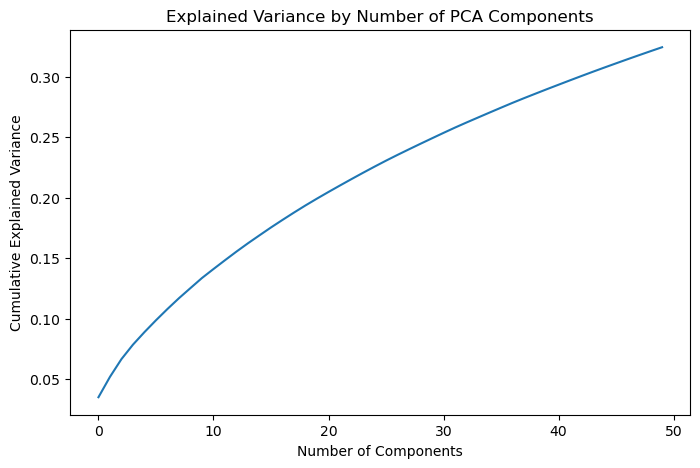

In [45]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.show()

In [46]:
#from sklearn.feature_selection import SelectKBest, chi2

# Select top 10 features
#selector = SelectKBest(chi2, k=10)
#top_features = selector.fit_transform(tfidf_matrix, df['rating'])

In [48]:
from scipy.sparse import csr_matrix


In [49]:
from sklearn.metrics.pairwise import cosine_similarity
tfidf_sparse = csr_matrix(tfidf_matrix)
def compute_similarity_in_batches(tfidf_matrix, batch_size=1000):
    num_docs = tfidf_matrix.shape[0]
    num_batches = (num_docs + batch_size - 1) // batch_size
    similarity_matrix = np.zeros((num_docs, num_docs), dtype=np.float32)
    
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, num_docs)
        batch = tfidf_matrix[start_idx:end_idx]
        sim_batch = cosine_similarity(batch, tfidf_matrix)
        similarity_matrix[start_idx:end_idx] = sim_batch
    
    return similarity_matrix


cosine_sim = compute_similarity_in_batches(tfidf_sparse)


In [70]:
cosine_sim[:5, :5]

array([[1.        , 0.        , 0.        , 0.00919384, 0.        ],
       [0.        , 1.        , 0.25236142, 0.03973386, 0.08242088],
       [0.        , 0.25236142, 1.        , 0.0944941 , 0.22312891],
       [0.00919384, 0.03973386, 0.0944941 , 1.        , 0.09016971],
       [0.        , 0.08242088, 0.22312891, 0.09016971, 1.        ]],
      dtype=float32)

In [67]:

meal_ids = df['meal_id'].tolist()

#  mapping from recipe ID to index in the similarity matrix
recipe2idx = {meal_id: idx for idx, meal_id in enumerate(meal_ids)}


In [72]:
print("Sample recipe2idx mapping:", dict(list(recipe2idx.items())[:5]))
print("Sample recipe_ids list:", meal_ids[:5])

Sample recipe2idx mapping: {68585.0: 48675, 1533.0: 52258, 102353.0: 2, 15892.0: 50215, 41531.0: 36382}
Sample recipe_ids list: [68585.0, 1533.0, 102353.0, 15892.0, 41531.0]


In [86]:
def get_similar_recipes(meal_id, top_n=5):
   
    if meal_id not in recipe2idx:
        print(f"meal ID {meal_id} not found in the mapping.")
        return []

    idx = recipe2idx[meal_id]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    
    print(f"Similarity scores for meal ID {meal_id}:", similarity_scores[:top_n+1])

    similar_recipes = [meal_ids[i[0]] for i in similarity_scores[1:top_n+1]]
    return similar_recipes


print(get_similar_recipes(15892))  

Similarity scores for meal ID 15892: [(17456, 1.0), (50215, 1.0), (26202, 0.7463864), (51789, 0.5668006), (35739, 0.5231275), (44338, 0.4897594)]
[15892.0, 56112.0, 55380.0, 53959.0, 461724.0]


In [50]:
from gensim.models import KeyedVectors
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

In [63]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV


In [91]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'meal_id', 'rating']], reader)


trainset, testset = train_test_split(data, test_size=0.20)

# Train SVD model
model = SVD()
model.fit(trainset)

# Predict ratings
predictions = model.test(testset)

# Evaluate SVD performance
rmse = accuracy.rmse(predictions)
rmse

RMSE: 0.8382


0.8381790718940534

In [92]:
mae = accuracy.mae(predictions)
print(f"MAE: {mae}")

MAE:  0.6676
MAE: 0.6676067283325674


In [93]:
from surprise.model_selection import cross_validate

results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8396  0.8336  0.8355  0.8362  0.0025  
MAE (testset)     0.6681  0.6642  0.6660  0.6661  0.0016  
Fit time          0.44    0.42    0.45    0.44    0.01    
Test time         0.05    0.07    0.06    0.06    0.01    


In [59]:
df['user_id'] = df['user_id'].astype(int)
df['recipe_id'] = df['meal_id'].astype(int)
df['rating'] = df['rating'].astype(float)


In [57]:
# Remove NaN or infinite values
df = df.dropna(subset=['user_id', 'meal_id', 'rating'])  
df = df[~np.isinf(df[['user_id', 'meal_id']]).any(axis=1)] 

In [115]:
def get_svd_recommendations(user_id, top_n=5):
   
    predictions = [model.predict(user_id, meal_id) for meal_id in meal_ids]
    
    
    predicted_scores = [pred.est for pred in predictions]
    
    # Create a dictionary of meal_id to predicted score
    meal_id_score_map = dict(zip(meal_ids, predicted_scores))
    
    # Sort meal_id 
    sorted_meal_ids = sorted(meal_id_score_map.keys(), key=lambda x: meal_id_score_map[x], reverse=True)
    
    # Get top N meal_ids 
    top_meal_ids = sorted_meal_ids[:top_n]
    
    return top_meal_ids

user_id = 1
svd_recommendations = get_svd_recommendations(user_id=user_id, top_n=5)
print(svd_recommendations)

def get_content_based_recommendations(recipe_id, top_n=5):
    return get_similar_recipes(recipe_id, top_n)


[96796.0, 264017.0, 192581.0, 140132.0, 41487.0]


In [116]:
svd_recommendations

[96796.0, 264017.0, 192581.0, 140132.0, 41487.0]

In [117]:
def hybrid_recommendation(user_id, meal_id, alpha=0.7, top_n=5):
    #  SVD recommendations
    svd_recipes = get_svd_recommendations(user_id, top_n * 3) 

    #  content-based recommendations
    content_based_recipes = get_content_based_recommendations(meal_id, top_n * 2)
    
   
    svd_scores = {rec: model.predict(user_id, rec).est for rec in svd_recipes}
    content_scores = {rec: cosine_sim[recipe2idx[meal_id], recipe2idx[rec]] for rec in content_based_recipes}
    
    # scores
    combined_scores = {}
    for meal in set(svd_scores.keys()).union(content_scores.keys()):
        svd_score = svd_scores.get(meal, 0)
        content_score = content_scores.get(meal, 0)
        combined_score = alpha * svd_score + (1 - alpha) * content_score
        combined_scores[meal] = combined_score
    
    # Sort recipes based on combined scores
    sorted_recipes = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Get top N meal IDs
    top_meals = [meal[0] for meal in sorted_recipes[:top_n]]
    
    # Fetch details for top meals
    recommendations = df[df['meal_id'].isin(top_meals)][['meal_id', 'recipe_name', 'restaurant']]
    
    return recommendations

# Example usage
print(hybrid_recommendation(user_id=1, meal_id=1533.0))  


Similarity scores for meal ID 1533.0: [(52258, 1.0), (30046, 0.68550825), (33784, 0.6020033), (31312, 0.600307), (52263, 0.5707333), (5443, 0.57070416), (35530, 0.5588987), (35531, 0.5023259), (52247, 0.50210667), (52250, 0.45600098), (52234, 0.4214513)]
         meal_id                                        recipe_name  \
1117    140132.0                         20 minute white bean chili   
2859     96796.0               agave roasted sweet potatoes   vegan   
4749     41487.0                             amazingly easy cookies   
7654    192581.0                                  apple potato soup   
7876    140132.0                                     applesauce pie   
8770     41487.0                   artichoke and tomato pasta sauce   
9226    192581.0                            asian crispy tofu salad   
10035   192581.0                asparagus  bean and pistachio salad   
10607   192581.0                                  aussie rice salad   
13218   192581.0                   